## Solving 1D Poisson Eqn with Periodic Boundary Conditions using PINNs

@author:  Sayantan 

Date :  27 March 2023




In [8]:
"""Backend supported: tensorflow.compat.v1, tensorflow, pytorch"""
import deepxde as dde
import numpy as np

# Import TensorFlow and NumPy
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Concatenate, Flatten, Dense, Conv2D, MaxPool2D, Dropout, BatchNormalization, Lambda
import matplotlib.pyplot as plt

np.random.seed(1234)
tf.random.set_seed(1234)

## The poisson's equation

$$
\begin{equation}
\nabla^2 \phi =  4 \pi G \rho
\end{equation} \tag{7}
$$
or rewriting interm of the field


\begin{equation}
\nabla \phi =  - \vec g 
% \nabla . \vec g = -4\pi G\rho
\end{equation}

$$
\begin{equation}
\nabla . \vec g = -4\pi G\rho
\end{equation}
$$

The density is 

$$
\begin{equation}
\rho = \rho_1 \cos(2\pi x/\lambda)
\end{equation}
$$

With periodic boundary conditions

$$
\begin{equation}
\phi(x=x_{min}) = \phi(x=x_{max})
\end{equation}
$$

$$
\begin{equation}
\partial_x \phi(x=x_{min}) =\partial_ \phi(x=x_{max})
\end{equation}
$$

In [2]:
## We test the solution of the POISSON's EQN 
#Set data type
DTYPE='float32'
tf.keras.backend.set_floatx(DTYPE)
#%matplotlib inline

lam = 1.0          # one wavelength
const = 1 ## we set 4 pi G  tp 1
num_of_waves = 2

rho_1 = 0.03;       # question 2b non-linear wave propagation
rho_o = 1          # zeroth order density
def pdeTest(x, y):
    dy_xx = dde.grad.hessian(y, x)    
    return dy_xx - const*(rho_1 * tf.cos(2*np.pi*x/lam))


Compiling model...
Building feed-forward neural network...
'build' took 0.171412 s



/home/sauddy3/PINNS-envcedar/lib/python3.10/site-packages/deepxde/nn/tensorflow_compat_v1/fnn.py:114: UserWarning: `tf.layers.dense` is deprecated and will be removed in a future version. Please use `tf.keras.layers.Dense` instead.
  return tf.layers.dense(
2023-03-29 18:34:03.863876: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-03-29 18:34:08.246025: W tensorflow/core/common_runtime/gpu/gpu_bfc_allocator.cc:42] Overriding orig_value setting because the TF_FORCE_GPU_ALLOW_GROWTH environment variable is set. Original config value was 0.
2023-03-29 18:34:08.249372: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1613] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 5516 MB memory:  -> device: 0, nam

'compile' took 5.675258 s

Initializing variables...


2023-03-29 18:34:09.406626: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:357] MLIR V1 optimization pass is not enabled


Training model...



2023-03-29 18:34:10.115331: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x2ac200009680 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-03-29 18:34:10.115484: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): Tesla P100-PCIE-12GB, Compute Capability 6.0
2023-03-29 18:34:10.330071: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-03-29 18:34:11.257573: I tensorflow/tsl/platform/default/subprocess.cc:304] Start cannot spawn child process: No such file or directory
2023-03-29 18:34:13.043809: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime of the process.


Step      Train loss                        Test loss                         Test metric
0         [4.51e-03, 2.59e-01, 1.99e-02]    [4.51e-03, 2.59e-01, 1.99e-02]    []  


2023-03-29 18:34:15.776976: I tensorflow/compiler/xla/stream_executor/gpu/asm_compiler.cc:325] ptxas warning : Registers are spilled to local memory in function 'fusion_32'



1000      [3.47e-04, 1.57e-11, 1.07e-06]    [3.47e-04, 1.57e-11, 1.07e-06]    []  
2000      [3.41e-04, 2.05e-12, 9.85e-07]    [3.41e-04, 2.05e-12, 9.85e-07]    []  
3000      [3.35e-04, 4.23e-12, 9.04e-07]    [3.35e-04, 4.23e-12, 9.04e-07]    []  

Best model at step 3000:
  train loss: 3.36e-04
  test loss: 3.36e-04
  test metric: []

'train' took 16.812565 s

Compiling model...
'compile' took 0.464678 s

Training model...



2023-03-29 18:34:26.762338: W tensorflow/compiler/jit/mark_for_compilation_pass.cc:1780] (One-time warning): Not using XLA:CPU for cluster.

If you want XLA:CPU, do one of the following:

 - set the TF_XLA_FLAGS to include "--tf_xla_cpu_global_jit", or
 - set cpu_global_jit to true on this session's OptimizerOptions, or
 - use experimental_jit_scope, or
 - use tf.function(jit_compile=True).

To confirm that XLA is active, pass --vmodule=xla_compilation_cache=1 (as a
proper command-line flag, not via TF_XLA_FLAGS).


Step      Train loss                        Test loss                         Test metric
3000      [3.35e-04, 4.23e-12, 9.04e-07]    [3.35e-04, 4.23e-12, 9.04e-07]    []  
INFO:tensorflow:Optimization terminated with:
  Message: CONVERGENCE: REL_REDUCTION_OF_F_<=_FACTR*EPSMCH
  Objective function value: 0.000000
  Number of iterations: 408
  Number of functions evaluations: 521
3521      [1.94e-08, 3.55e-15, 5.68e-14]    [1.94e-08, 3.55e-15, 5.68e-14]    []  

Best model at step 3521:
  train loss: 1.94e-08
  test loss: 1.94e-08
  test metric: []

'train' took 7.253811 s

Saving loss history to /scratch/sauddy3/PINNS-2023/PINNS-Poissons/loss.dat ...
Saving training data to /scratch/sauddy3/PINNS-2023/PINNS-Poissons/train.dat ...
Saving test data to /scratch/sauddy3/PINNS-2023/PINNS-Poissons/test.dat ...


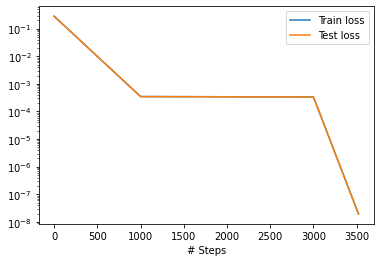

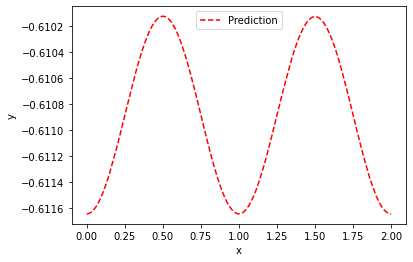

In [3]:
## The Geometric Domain 
xmin = 0
xmax = xmin + lam * num_of_waves
geom = dde.geometry.Interval(xmin, xmax)
# geom = dde.geometry.Interval(-1, 1)


## Boundaries

## Note in the deep XDE code by default for the periodic boundary u(0) = u(1)
## If the problem is periodic this condition will also satisfy u(-1) = u(1)
## Thus is most cases the left boundary is not needed. But we have the option here

def boundary_l(x, on_boundary):  # boundary x=-1 or x = 0 
    if xmin == -1:
        is_on_boundary_left = on_boundary and np.isclose(x[0], xmin)
    else:
        is_on_boundary_left = on_boundary and np.isclose(x[0], 0)
    return is_on_boundary_left

def boundary_r(x, on_boundary):  # boundary x=1
    is_on_boundary_right = on_boundary and np.isclose(x[0], xmax)

    return is_on_boundary_right


bc_l = dde.icbc.PeriodicBC(geom, 0, boundary_l,derivative_order=0) ## may be used when x = [-1,1] otherwise for x =[0,1] not needed
bc_r = dde.icbc.PeriodicBC(geom, 0, boundary_r,derivative_order=0)

## 1st order terms

bc_ll = dde.icbc.PeriodicBC(geom, 0, boundary_l,derivative_order=1) ##may be used when x = [-1,1]
bc_rr = dde.icbc.PeriodicBC(geom, 0, boundary_r,derivative_order=1)

data = dde.data.TimePDE(geom,
                     pdeTest,
#                      [bc_l,bc_r,bc_ll,bc_rr], ## This is needed if one need to force periodicity on the left 
                     [bc_r,bc_rr],          ## For x =[0,1] and default
                     num_domain=10000,
                     num_boundary=5000
                     #num_initial=5000,
                    # num_test=10000,
                   )

net = dde.nn.FNN([1] + [32] * 3 + [1], "sin", "Glorot normal")
model_test = dde.Model(data, net)

model_test.compile("adam", lr=1e-3)
model_test.train(iterations=3000)
model_test.compile("L-BFGS")


losshistory, train_state = model_test.train()
dde.saveplot(losshistory, train_state, issave=True, isplot=True)

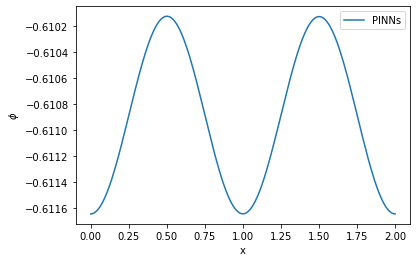

In [5]:
X = np.linspace(xmin,xmax,1000).reshape(1000, 1)
output_0 = model_test.predict(X)
plt.plot(X,output_0,label="PINNs")
plt.ylabel(r"$\phi$")
plt.xlabel("x")
plt.legend()


## The analytic solution to the poisson Eqn can be obtained using fft methods

In [6]:
def fft_solver(rho,Lx,N, dim = None):
    
    '''
    A FFT solver that uses discrete Fast Fourier Transform to
    solve the poisson Equation:
    We apply the correction due to the finite difference grid of phi
    
    Input: 1. The source function: density in this case
           2. # of grid point N
           3. Domain Size in each dimension
    
    Output: the potential phi and the field g 
    
    '''
    nx = N
    Lx = Lx
    
    dx = Lx / nx
    
    
    # Calculate the Fourier modes of the gas density
    rhohat = fft(rho)

    # Calculate the wave numbers in x and y directions
    kx = 2 * np.pi * np.fft.fftfreq(nx, dx)
    #ky = 2 * np.pi * np.fft.fftfreq(ny, dy)

    # Construct the Laplacian operator in Fourier space
    kx2 = np.meshgrid(kx**2)
    
#     laplace = -(kx**2 )
    ## Laplace with the correction refer to the notes
    laplace = 2*(np.cos(kx*dx)-1)
    
    ## Inorder to avoid the inf we replace zero with a small number
    laplace[laplace == 0] = 1e-16
    
    # Solve for the gravitationa potential in Fourier space
    phihat = rhohat / laplace
    
    phihat = rhohat * dx**2/laplace
#     window = signal.windows.tukey(len(phihat),alpha=0.25)


    # Transform back to real space to obtain the solution
#     phi = np.real(ifft(phihat*window))
    phi = np.real(ifft(phihat))
    
    ## The field ,i.e., gravity 
    dphidx = np.gradient(phi, dx)

    return phi,dphidx

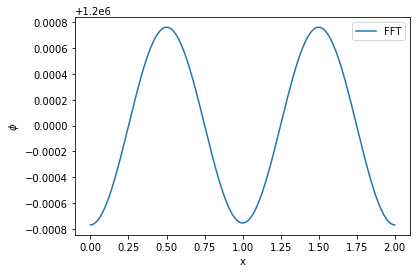

In [7]:
from numpy.fft import fft, ifft
from scipy import signal
L = lam * num_of_waves   
N = 1000
x = np.linspace(0, L, N)
rho = rho_1 * np.cos(2*np.pi*x/lam)

phi, dpidx  = fft_solver(const*(rho),L,N, dim = None)
plt.plot(x,phi,label="FFT")
plt.ylabel(r"$\phi$")
plt.xlabel("x")
plt.legend()